[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1001, 2)
[[0.5]
 [0.5]
 [0.5]
 ...
 [0.5]
 [0.5]
 [0.5]]


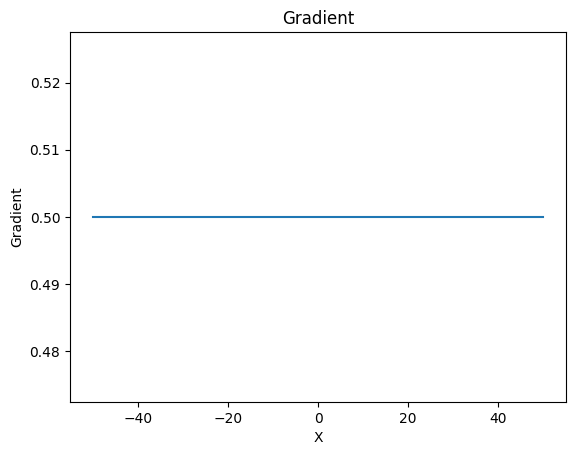

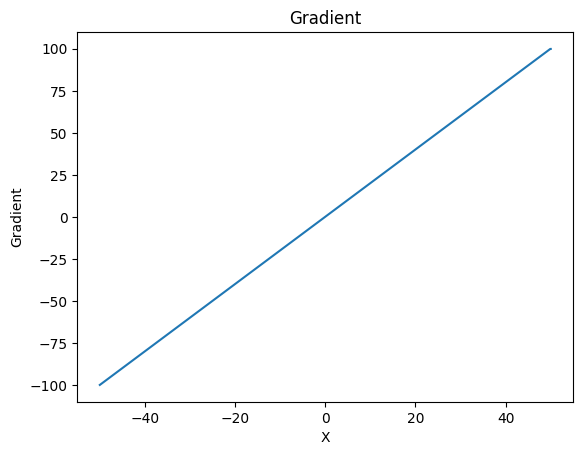

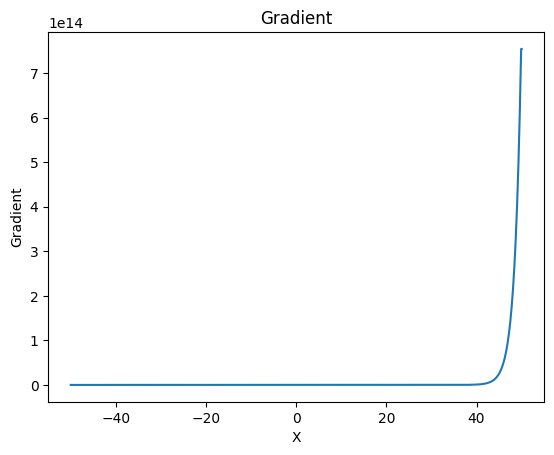

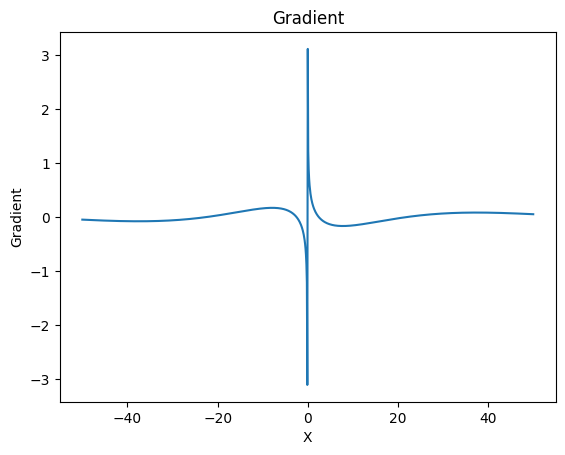

 Index = 500
X @ min Y = 7.105427357601002e-13
Y @ min point = 5.048709793414476e-25
 Index = 498
X @ min Y = -0.1999999999992923
Y @ min point = 0.9505505632959851
 Index = 722
X @ min Y = 22.200000000001026
Y @ min point = -0.9999997540298114


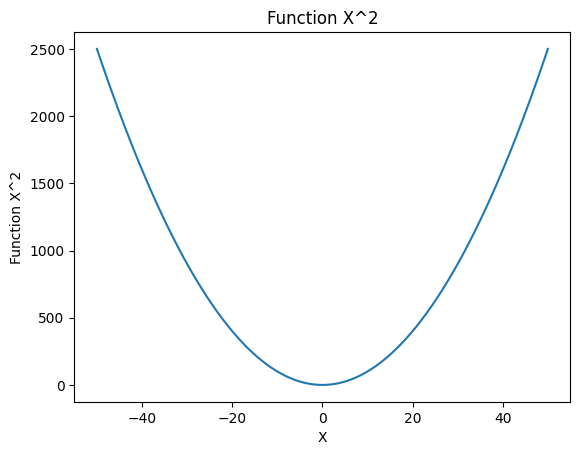

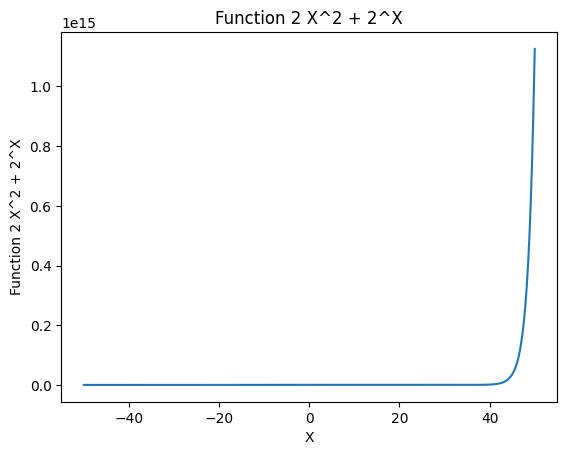

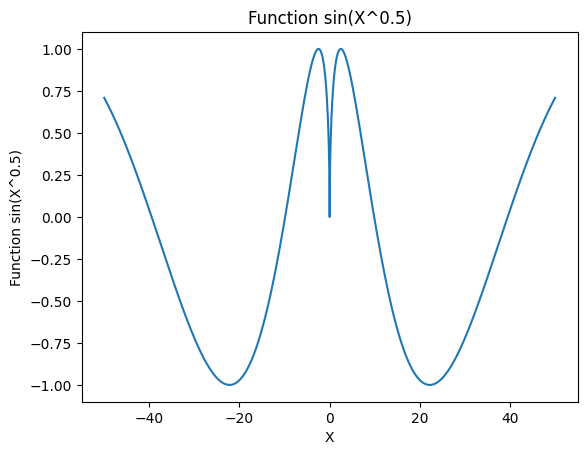

In [81]:
# [Problem 1] Linear function
# y = 0.5 x + 1; -50 < x < 50
import numpy as np
X = np.arange(-50, 50.1, 0.1)
Y = 0.5*X + 1
print(X)
print(Y)
# [Problem 2] Array combination
XT = np.transpose(X)
YT = np.transpose(Y)
Z = np.stack((XT, YT), axis=1)
print(Z)
print(np.shape(Z))

# [Problem 3] Find the gradient
[N, M] = np.shape(Z)
grad = np.zeros((N,1))
for i in range(1,(N-1),1):
    grad[i] = (YT[i+1]-YT[i])/(XT[i+1]-XT[i])

grad[0] = (YT[1]-YT[0])/(XT[1]-XT[0])
grad[N-1] =  (YT[N-1]-YT[N-2])/(XT[N-1]-XT[N-2])
print(grad)

# [Problem 4] Draw a graph
import matplotlib.pyplot as plt
plt.title("Gradient")
plt.xlabel("X")
plt.ylabel("Gradient")
plt.plot(XT,grad)
plt.show()

# [Problem 5] Python functionalization

def compute_gradient(function, x_range= np.arange(-50, 50.1, 0.1)):
    """
    Calculate the gradient using the amount of change.

    Parameters
    ----------------
    function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range : tuple
      Specify the range in the same way as the argument of np.arange ().

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    Y = function(x_range);
    XT = np.transpose(x_range)
    YT = np.transpose(Y)
    array_xy = np.stack((XT, YT), axis=1)
    [N, M] = np.shape(array_xy)
    gradient = np.zeros((N,1))
    for i in range(1,(N-1),1):
        gradient[i] = (YT[i+1]-YT[i])/(XT[i+1]-XT[i])

    gradient[0] = (YT[1]-YT[0])/(XT[1]-XT[0])
    gradient[N-1] =  (YT[N-1]-YT[N-2])/(XT[N-1]-XT[N-2])
    
    
    return array_xy, gradient

def x2(array_x):
    array_y = array_x*array_x
    return array_y

def x2p2x(array_x):
    array_y = 2*array_x*array_x + 2**array_x
    return array_y

def sinxhalf(array_x):
    array_y = np.sin((abs(array_x))**(0.5))
    return array_y

plt.figure("""figure 1""")
array_xy, gradient = compute_gradient(x2)
plt.title("Gradient")
plt.xlabel("X")
plt.ylabel("Gradient")
plt.plot(array_xy[:,0],gradient)
plt.show()

plt.figure("""figure 2""")
array_xy, gradient = compute_gradient(x2p2x)
plt.title("Gradient")
plt.xlabel("X")
plt.ylabel("Gradient")
plt.plot(array_xy[:,0],gradient)
plt.show()

plt.figure("""figure 3""")
array_xy, gradient = compute_gradient(sinxhalf)
plt.title("Gradient")
plt.xlabel("X")
plt.ylabel("Gradient")
plt.plot(array_xy[:,0],gradient)
plt.show()

# [Problem 6] Find the minimum value
array_xy, gradient = compute_gradient(x2)
i = np.argmin(array_xy[:,1])
print(" Index = {}".format(i))
print("X @ min Y = {}".format(array_xy[i][0]))
print("Y @ min point = {}".format(array_xy[i][1]))
plt.figure("""figure 4""")
plt.title("Function X^2")
plt.xlabel("X")
plt.ylabel("Function X^2")
plt.plot(array_xy[:,0],array_xy[:,1])



array_xy, gradient = compute_gradient(x2p2x)
i = np.argmin(array_xy[:,1])
print(" Index = {}".format(i))
print("X @ min Y = {}".format(array_xy[i][0]))
print("Y @ min point = {}".format(array_xy[i][1]))
plt.figure("""figure 5""")
plt.title("Function 2 X^2 + 2^X")
plt.xlabel("X")
plt.ylabel("Function 2 X^2 + 2^X")
plt.plot(array_xy[:,0],array_xy[:,1])



array_xy, gradient = compute_gradient(sinxhalf)
i = np.argmin(array_xy[:,1])
print(" Index = {}".format(i))
print("X @ min Y = {}".format(array_xy[i][0]))
print("Y @ min point = {}".format(array_xy[i][1]))
plt.figure("""figure 6""")
plt.title("Function sin(X^0.5)")
plt.xlabel("X")
plt.ylabel("Function sin(X^0.5)")
plt.plot(array_xy[:,0],array_xy[:,1])
